# 1) Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams. This outline and the framework code in `ex2.m` will guide you through the exercise.

## 1.1) Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. In the first part of `ex2.m`, the code will load the data and display it on a 2-dimensional plot by calling the function `plotData`. You will now complete the code in `plotData` so that it displays a figure like Figure 1, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

In [1]:
data = load('/home/roger/Workspace/MOOC/Coursera/MLearning/Week 3/Assignment/ex2/ex2data1.txt');
X = data(:, [1, 2]);
y = data(:, 3);

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


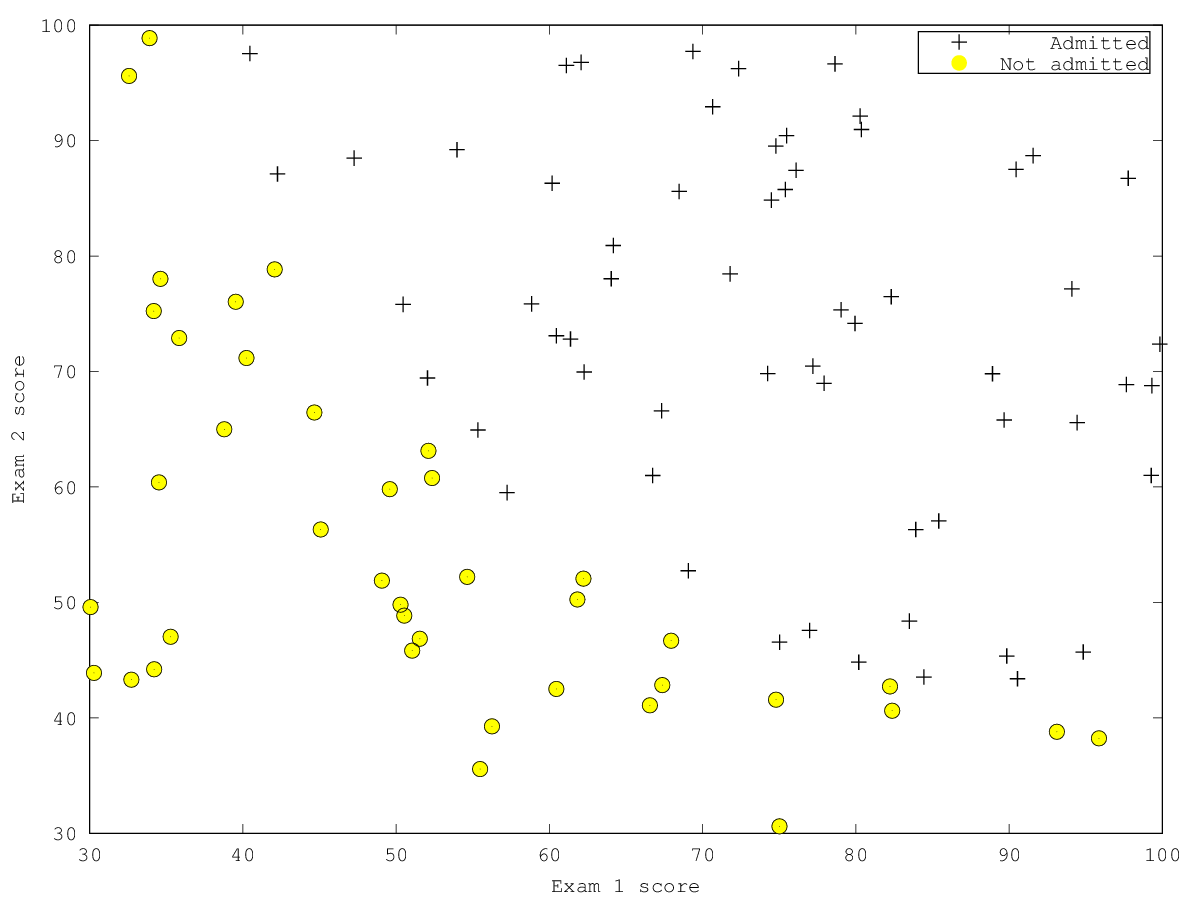

In [2]:
%% ==================== Part 1: Plotting ====================
%  We start the exercise by first plotting the data to understand the 
%  the problem we are working with.

function plotData(X, y)
    %PLOTDATA Plots the data points X and y into a new figure 
    %   PLOTDATA(x,y) plots the data points with + for the positive examples
    %   and o for the negative examples. X is assumed to be a Mx2 matrix.
    % Instructions: Plot the positive and negative examples on a
    %               2D plot, using the option 'k+' for the positive
    %               examples and 'ko' for the negative examples.

    % Create New Figure
    figure; hold on;

    % Find Indices of Positive and Negative Examples
    pos = find(y==1); 
    neg = find(y == 0);
    
    % Plot Examples
    plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 2, 'MarkerSize', 7);
    plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y', 'MarkerSize', 7);

    hold off;

end

fprintf(['Plotting data with + indicating (y = 1) examples and o ' ...
         'indicating (y = 0) examples.\n']);
plotData(X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

## 1.2.1) Implementation Warmup exercise: sigmoid function 

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$h_\theta(x) = g(\theta^Tx)$$

where function g is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Your first step is to implement this function in `sigmoid.m` so it can be called by the rest of your program. When you are finished, try testing a few values by calling `sigmoid(x)` at the Octave/MATLAB command line. For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices. **For a matrix, your function should perform the sigmoid function on every element**.

You can submit your solution for grading by typing submit at the Octave/MATLAB command line. The submission script will prompt you for your login e-mail and submission token and ask you which files you want to submit. You can obtain a submission token from the web page for the assignment.

In [3]:
function g = sigmoid(z)
    %SIGMOID Compute sigmoid function
    %   J = SIGMOID(z) computes the sigmoid of z.

    % You need to return the following variables correctly 
    g = zeros(size(z));
    [w, h] = size(z);

    for i = 1:w
        for j = 1:h
            g(i,j) = 1/(1+exp(-z(i,j)));
        end
    end
end

sigmoid(0)

ans =  0.50000


## 1.2.2) Cost function and gradient

Now you will implement the cost function and gradient for logistic regression. Complete the code in costFunction.m to return the cost and gradient. Recall that the cost function in logistic regression is

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)}log(h_\theta(x^{(i)})-(1 - y^{(i)})log(1 - h_\theta(x^{(i)}))]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the j-th element (for j=0, 1,..., n) is defined as follows:

$$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)} - y^{(i)})x_j^{(i)}$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$. Once you are done, `ex2.m` will call your costFunction using the initial parameters of $\theta$. You should see that the cost is about 0.693.

In [4]:
function [J, grad] = costFunction(theta, X, y)
    %COSTFUNCTION Compute cost and gradient for logistic regression
    %   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    %   parameter for logistic regression and the gradient of the cost
    %   w.r.t. to the parameters.
    % Instructions: Compute the cost of a particular choice of theta.
    %               You should set J to the cost.
    %               Compute the partial derivatives and set grad to the partial
    %               derivatives of the cost w.r.t. each parameter in theta

    % Initialize some useful values
    m = length(y); % number of training examples

    % You need to return the following variables correctly 
    J = 0;
    grad = zeros(size(theta));

    h_theta = sigmoid(X*theta);
    %errors = (-y).*(log(h_theta)) - (1-y).*log(1-h_theta);
    %J = 1/m * sum(errors);
    % using dot product
    J = 1/m * ((-y)'*log(h_theta)-(1-y)'*log(1-h_theta));

    %n = size(theta,1);
    %for i=1:m
    %  h_theta = sigmoid(theta'*X(i,:)');
    %  err = h_theta - y(i);   
    %  for j=1:n
    %    grad(j) = grad(j) + err * X(i,j); 
    %  end;
    %end;
    %grad = grad/m;
    % using dot product
     grad = (X'*(h_theta - y))/m;
end

In [5]:
[m, n] = size(X);
% Add intercept term to x and X_test
X = [ones(m, 1) X];
% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

[cost, grad] = costFunction(initial_theta, X, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 


## 1.2.3) Learning parameters using fminunc

In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradent descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly.

This time, instead of taking gradient descent steps, you will use an Octave/MATLAB built-in function called `fminunc`. Octave/MATLAB's `fminunc` is an optimization solver that finds the minimum of an unconstrained 2 function. For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `fminunc` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of `X` and `y` values). You will pass to `fminunc` the following inputs:
 * The initial values of the parameters we are trying to optimize.
 * A function that, when given the training set and a particular $\Theta$, computes the logistic regression cost and gradient with respect to $\Theta$ for the dataset (`X`, `y`)
 
In `ex2.m`, we already have code written to call `fminunc` with the correct arguments.

```octave
% Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);
% Run fminunc to obtain the optimal theta
% This function will return theta and the cost
[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial theta, options);
```

In this code snippet, we first defined the options to be used with `fminunc`. Specifically, we set the `GradObj` option to on, which tells `fminunc` that our function returns both the cost and the gradient. This allows `fminunc` to use the gradient when minimizing the function. Furthermore, we set the `MaxIter` option to 400, so that `fminunc` will run for at most 400 steps before it terminates.

To specify the actual function we are minimizing, we use a "short-hand" for specifying functions with the `@(t)(costFunction(t, X, y))`. This creates a function, with argument `t`, which calls your `costFunction`. This allows us to wrap the `costFunction` for use with `fminunc`. 

If you have completed the `costFunction` correctly, `fminunc` will converge on the right optimization parameters and return the final values of the cost and $\theta$. Notice that by using `fminunc`, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by `fminunc`: you only needed to provide a function calculating the cost and the gradient.

Once `fminunc` completes, `ex2.m` will call your `costFunction` function using the optimal parameters of $\Theta$. You should see that the cost is about 0.203.
This final $\theta$ value will then be used to plot the decision boundary on the training data, resulting in a figure similar to Figure 2. We also encourage you to look at the code in `plotDecisionBoundary.m` to see how to plot such a boundary using the $\theta$ values.

In [6]:
function plotDecisionBoundary(theta, X, y)
    %PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
    %the decision boundary defined by theta
    %   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
    %   positive examples and o for the negative examples. X is assumed to be 
    %   a either 
    %   1) Mx3 matrix, where the first column is an all-ones column for the 
    %      intercept.
    %   2) MxN, N>3 matrix, where the first column is all-ones

    % Plot Data
    plotData(X(:,2:3), y);
    hold on

    if size(X, 2) <= 3
        % Only need 2 points to define a line, so choose two endpoints
        plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

        % Calculate the decision boundary line
        plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

        % Plot, and adjust axes for better viewing
        plot(plot_x, plot_y)

        % Legend, specific for the exercise
        legend('Admitted', 'Not admitted', 'Decision Boundary')
        axis([30, 100, 30, 100])
    else
        % Here is the grid range
        u = linspace(-1, 1.5, 50);
        v = linspace(-1, 1.5, 50);

        z = zeros(length(u), length(v));
        % Evaluate z = theta*x over the grid
        for i = 1:length(u)
            for j = 1:length(v)
                z(i,j) = mapFeature(u(i), v(j))*theta;
            end
        end
        z = z'; % important to transpose z before calling contour

        % Plot z = 0
        % Notice you need to specify the range [0, 0]
        contour(u, v, z, [0, 0], 'LineWidth', 2)
    end
    hold off
end

Cost at theta found by fminunc: 0.203498
theta: 
 -25.161272 
 0.206233 
 0.201470 


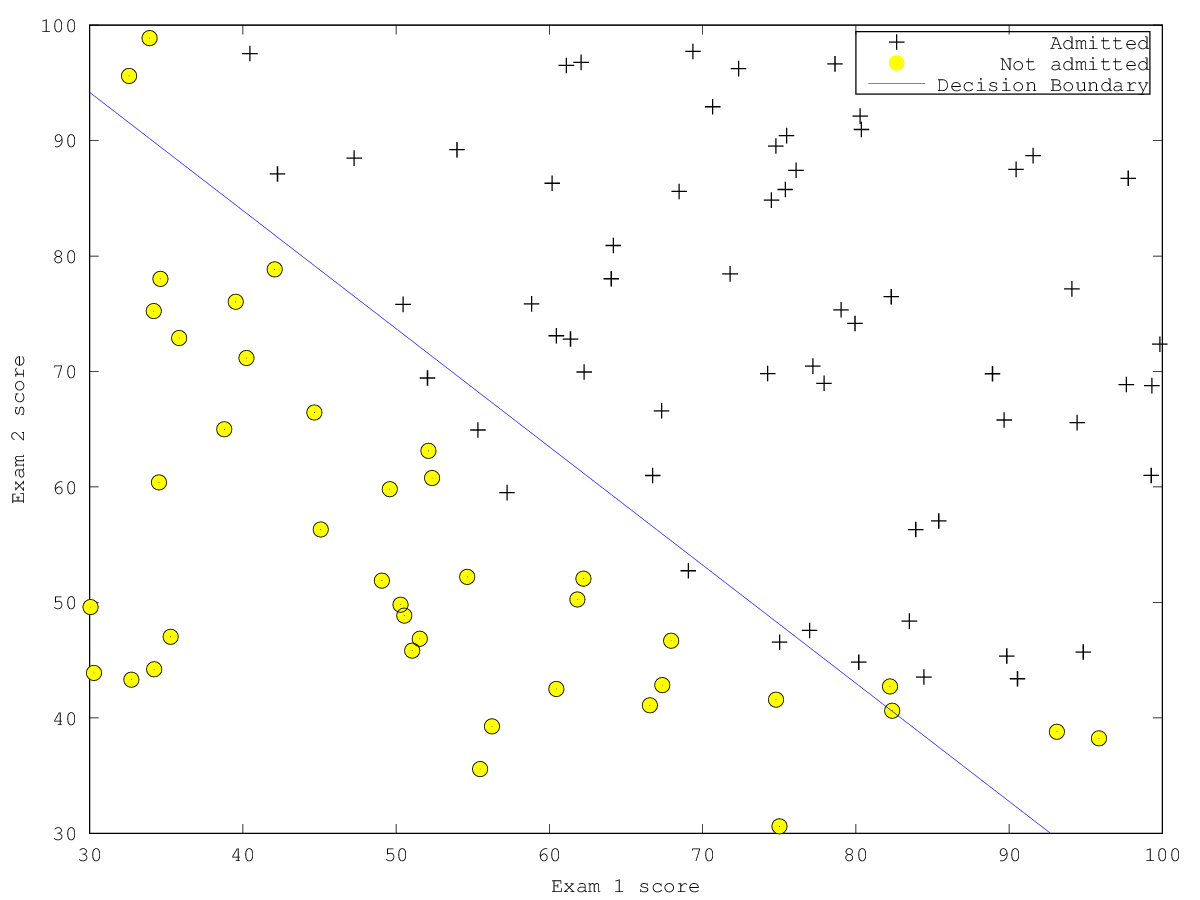

In [7]:
%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);
%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('theta: \n');
fprintf(' %f \n', theta);

% Plot Boundary
plotDecisionBoundary(theta, X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

## 1.2.4 Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in `predict.m`. The predict function will produce "1" or "0" predictions given a dataset and a learned parameter vector $\Theta$. After you have completed the code in `predict.m`, the `ex2.m` script will proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [14]:
function p = predict(theta, X)
    %PREDICT Predict whether the label is 0 or 1 using learned logistic 
    %regression parameters theta
    %   p = PREDICT(theta, X) computes the predictions for X using a 
    %   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    % Instructions: Complete the following code to make predictions using
    %               your learned logistic regression parameters. 
    %               You should set p to a vector of 0's and 1's
    
    m = size(X, 1); % Number of training examples

    % You need to return the following variables correctly
    p = zeros(m, 1);

    for i = 1:m
        if( sigmoid(X(i, :)*theta) >= 0.5 )
            p(i) = 1;
        else
            p(i) = 0;
        end
    end
end

# 2) Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

You will use another script, `ex2_reg.m` to complete this portion of the exercise.

## 2.1) Visualizing the data

Similar to the previous parts of this exercise, `plotData` is used to generate a figure like Figure 3, where the axes are the two test scores, and the positive (y=1, accepted) and negative (y=0, rejected) examples are shown with different markers. Figure 3 shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

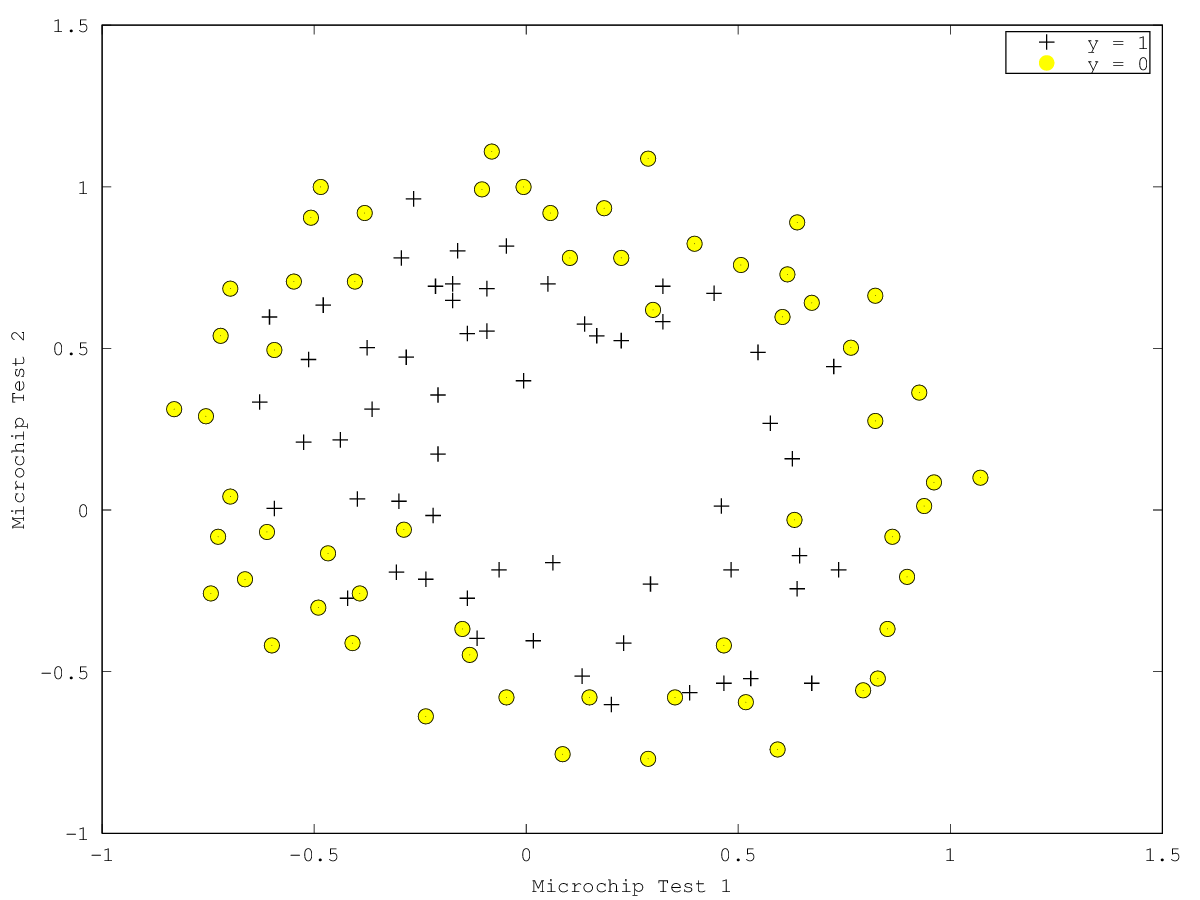

In [17]:
%% Initialization
clear ; close all; clc

%% Load Data
%  The first two columns contains the X values and the third column
%  contains the label (y).

data = load('/home/roger/Workspace/MOOC/Coursera/MLearning/Week 3/Assignment/ex2/ex2data2.txt');
X = data(:, [1, 2]); y = data(:, 3);

plotData(X, y);

% Put some labels 
hold on;

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

% Specified in plot order
legend('y = 1', 'y = 0')
hold off;

## 2.2) Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function `mapFeature.m`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$mapFeature(x) = \begin{bmatrix}
1  \\ 
x_1 \\ 
x_2 \\ 
x_1^2 \\ 
x_1x_2 \\ 
x_2^2 \\ 
x_1^3 \\ 
\vdots \\ 
x_1x_2^5 \\ 
x_2^6 \\
\end{bmatrix}$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [18]:
function out = mapFeature(X1, X2)
    % MAPFEATURE Feature mapping function to polynomial features
    %
    %   MAPFEATURE(X1, X2) maps the two input features
    %   to quadratic features used in the regularization exercise.
    %
    %   Returns a new feature array with more features, comprising of 
    %   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    %
    %   Inputs X1, X2 must be the same size
    %

    degree = 6;
    out = ones(size(X1(:,1)));
    for i = 1:degree
        for j = 0:i
            out(:, end+1) = (X1.^(i-j)).*(X2.^j);
        end
    end
end

## 2.3 Cost function and gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code in `costFunctionReg.m` to return the cost and gradient. Recall that the regularized cost function in logistic regression is:

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)}log(h_\Theta(x^{(i)})-(1 - y^{(i)})log(1 - h_\Theta(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2$$

Note that you should not regularize the parameter θ 0 . In Octave/MATLAB, recall that indexing starts from 1, hence, you should not be regularizing the theta(1) parameter (which corresponds to $\theta$ 0 ) in the code. The gradient of the cost function is a vector where the j-th element is defined as follows:

$$\frac{\partial}{\partial\theta_0}J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)} - y^{(i)})x_j^{(i)}$$

for j = 0, and 

$$\frac{\partial}{\partial\theta_0}J(\theta) = \left (\frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)} - y^{(i)})x_j^{(i)}\right ) + \frac{\lambda}{m} \theta_j$$
 
for j >= 1. Once you are done, `ex2_reg.m` will call your `costFunctionReg` function using the initial value of $\theta$ (initialized to all zeros). You should see that the cost is about 0.693.

In [19]:
function [J, grad] = costFunctionReg(theta, X, y, lambda)
    %COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    %   J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    %   theta as the parameter for regularized logistic regression and the
    %   gradient of the cost w.r.t. to the parameters. 
    % Instructions: Compute the cost of a particular choice of theta.
    %               You should set J to the cost.
    %               Compute the partial derivatives and set grad to the partial
    %               derivatives of the cost w.r.t. each parameter in theta
    
    % Initialize some useful values
    m = length(y); % number of training examples

    % You need to return the following variables correctly 
    J = 0;
    grad = zeros(size(theta));

    h_theta = sigmoid(X*theta);
    theta1 = [0 ; theta(2:size(theta), :)];
    reg = (lambda/(2*m)) * theta1'*theta1;
    J = (1/m * ((-y)'*log(h_theta)-(1-y)'*log(1-h_theta))) +  reg;

    gradreg = (lambda/m)*theta1;
    grad = ((X'*(h_theta - y))/m)+gradreg;

end

In [20]:
% Add Polynomial Features

% Note that mapFeature also adds a column of ones for us, so the intercept
% term is handled
X = mapFeature(X(:,1), X(:,2));

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = costFunctionReg(initial_theta, X, y, lambda);

fprintf('Cost at initial theta (zeros): %f\n', cost);


Cost at initial theta (zeros): 0.693147


## 2.3.1) Learning parameters using fminunc

Similar to the previous parts, you will use fminunc to learn the optimal parameters $\theta$. If you have completed the cost and gradient for regularized logistic regression (`costFunctionReg.m`) correctly, you should be able to step through the next part of `ex2_reg.m` to learn the parameters $\theta$ using `fminunc`.

In [22]:
% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 1;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

## 2.4) Plotting the decision boundary

To help you visualize the model learned by this classifier, we have provided the function `plotDecisionBoundary.m` which plots the (non-linear) decision boundary that separates the positive and negative examples. In `plotDecisionBoundary.m`, we plot the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then and drew a contour plot of where the predictions change from y=0 to y=1. After learning the parameters $\theta$, the next step in `ex2_reg.m` will plot a decision boundary similar to Figure 4.

Train Accuracy: 82.203390


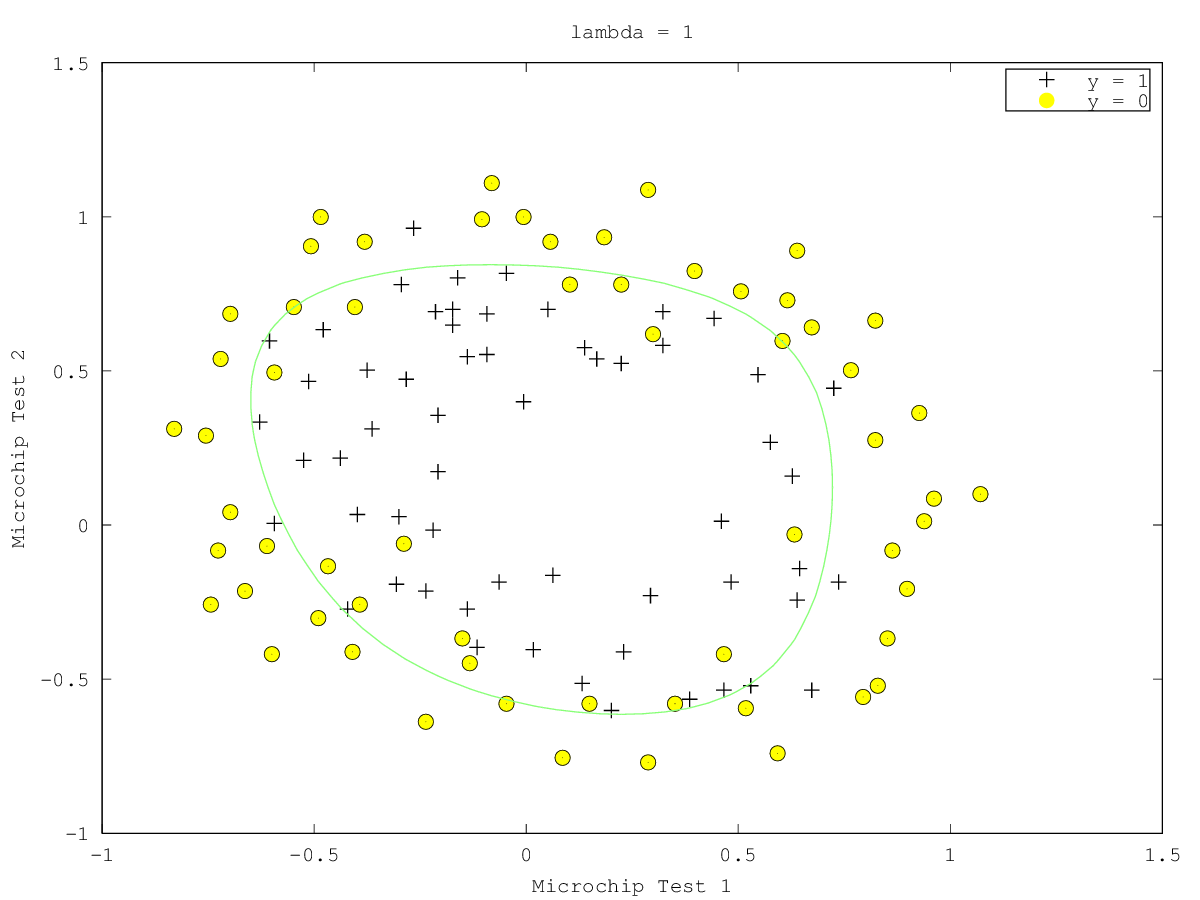

In [23]:
% Plot Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

legend('y = 1', 'y = 0', 'Decision boundary')
hold off;

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);

## 2.5 Optional (ungraded) exercises

In this part of the exercise, you will get to try out different regularization parameters for the dataset to understand how regularization prevents overfitting. Notice the changes in the decision boundary as you vary $\lambda$. With a small $\lambda$, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data (Figure 5). This is not a good decision boundary: for example, it predicts that a point at x = (−0.25, 1.5) is accepted (y = 1), which seems to be an incorrect decision given the training set.

With a larger $\lambda$, you should see a plot that shows an simpler decision boundary which still separates the positives and negatives fairly well. However, if $\lambda$ is set to too high a value, you will not get a good fit and the decision boundary will not follow the data so well, thus underfitting the data (Figure 6).

In [32]:
% Function to plot when changing the lambda
function plotWithLambda(X, y, lambda)
    % Plot function when the lambda is changed
    % Initialize fitting parameters
    initial_theta = zeros(size(X, 2), 1);
    
    % Set Options
    options = optimset('GradObj', 'on', 'MaxIter', 400);

    % Optimize
    [theta, J, exit_flag] = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

    % Plot Boundary
    plotDecisionBoundary(theta, X, y);
    hold on;
    title(sprintf('lambda = %g', lambda))

    % Labels and Legend
    xlabel('Microchip Test 1')
    ylabel('Microchip Test 2')

    legend('y = 1', 'y = 0', 'Decision boundary')
    hold off;

    % Compute accuracy on our training set
    p = predict(theta, X);

    fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
end

Train Accuracy: 86.440678


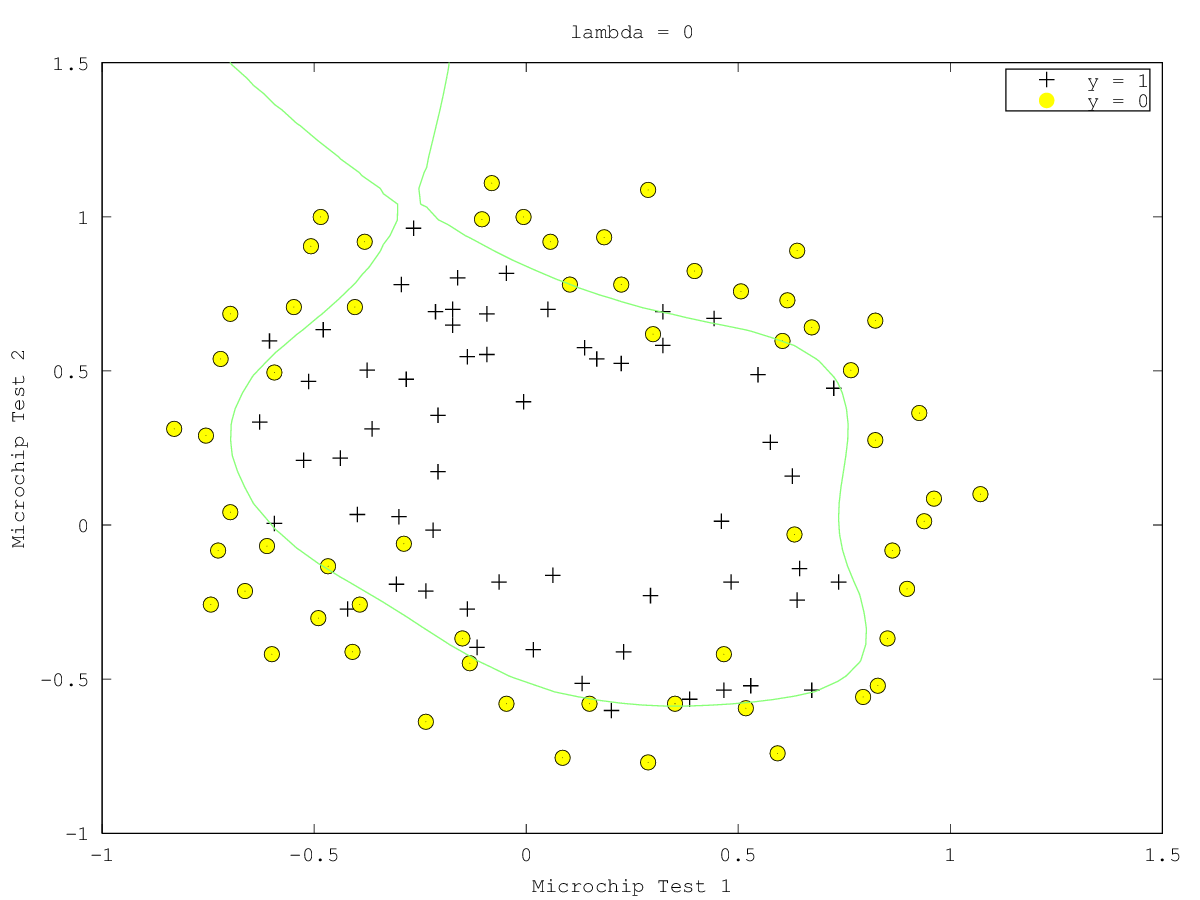

In [33]:
% Set regularization parameter lambda to 0
lambda = 0;
plotWithLambda(X, y, lambda)

Train Accuracy: 61.864407


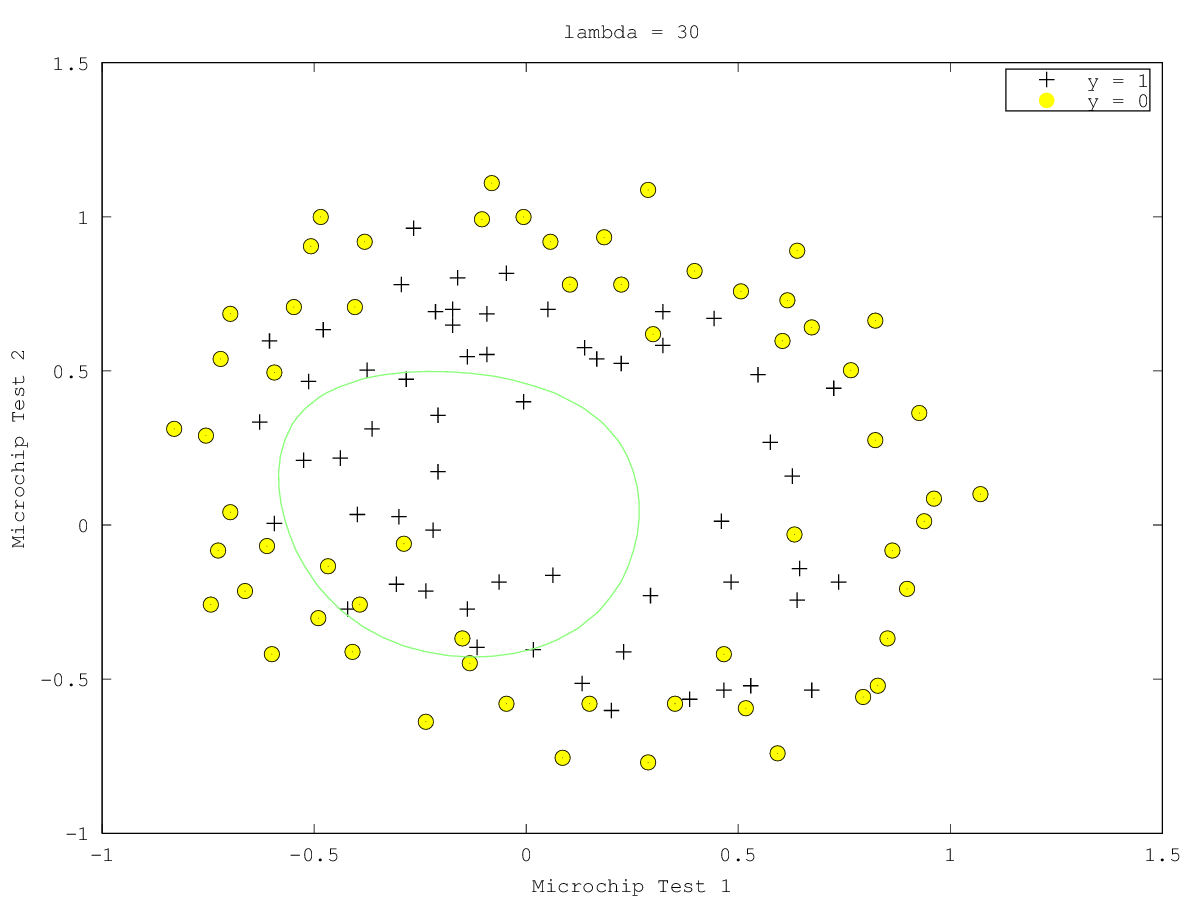

In [37]:
% Set regularization parameter lambda to 30
lambda = 30;
plotWithLambda(X, y, lambda)